## Beta nasıl hesaplanır?

Beta, bir hisse senedinin piyasa endeksine göre ne kadar risk taşıdığını ölçen bir finansal göstergedir. Beta değeri, hisse senedinin piyasa hareketlerine ne kadar duyarlı olduğunu gösterir. Beta değeri 1'den büyükse, hisse senedi piyasa endeksinden daha volatil (dalgalı) demektir. Beta değeri 1'den küçükse, hisse senedi piyasa endeksine göre daha az volatil demektir.

Beta hesaplamak için öncelikle bizler hisse senedinin ve piyasa endeksinin fiyat verilerine ihtiyacımız var. Bu verileri genellikle günlük, haftalık veya aylık bazda alabiliriz. Daha sonra bu verileri kullanarak beta değerini hesaplayabiliriz.

Ben S&P 500 endeksini kullanarak bir AMD hissenin beta değerini hesaplayacağım. Bunun için öncelikle S&P 500 endeksinin ve AMD fiyat verilerini alacağım. Daha sonra bu verileri kullanarak beta değerini hesaplayacağım.

### Gerekli kütüphaneler
yfinance: Finansal verileri indirmek için kullanılır. \
numpy: Matematiksel işlemler için kullanılır.\
pandas: Veri işleme ve analiz için kullanılır.

S&P 500 endeksi için `^GSPC` sembolünü kullanacağız. AMD hissesinin sembolü ise `AMD`'dir. Bu sembollerle verileri indireceğiz.\
Kütüphaneleri import edelim ve gerekli verileri indirelim.

In [79]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm

# S&P 500 endeksi ve AMD hissesinin verilerini indiriyoruz
sp500 = yf.download("^GSPC", start="2021-12-28", end="2024-12-30", interval="1wk")
amd = yf.download("AMD", start="2021-12-28", end="2024-12-30", interval="1wk")
# Verileri kontrol edelim
print(sp500.head())
print(amd.head())

/var/folders/0b/6hnxyt0n5d795n3njb2grq1h0000gn/T/ipykernel_48948/32821704.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2021-12-28", end="2024-12-30", interval="1wk")
[*********************100%***********************]  1 of 1 completed
/var/folders/0b/6hnxyt0n5d795n3njb2grq1h0000gn/T/ipykernel_48948/32821704.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  amd = yf.download("AMD", start="2021-12-28", end="2024-12-30", interval="1wk")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                                       
2021-12-27  4766.180176  4808.930176  4765.750000  4795.490234  11474000000
2022-01-03  4677.029785  4818.620117  4662.740234  4778.140137  21878940000
2022-01-10  4662.850098  4748.830078  4582.240234  4655.339844  21251840000
2022-01-17  4397.939941  4632.240234  4395.339844  4632.240234  19444410000
2022-01-24  4431.850098  4453.229980  4222.620117  4356.319824  27889090000
Price            Close        High         Low        Open     Volume
Ticker             AMD         AMD         AMD         AMD        AMD
Date                                                                 
2021-12-27  143.899994  156.729996  143.550003  155.880005  203805400
2022-01-03  132.000000  152.419998  131.130005  145.139999  328244300
2022-01-10  136.880005  141.250000  125.02

### Beta Hesaplama
Beta değerini hesaplamak için öncelikle S&P 500 endeksi ve AMD hissesinin haftalık getirilerini hesaplayacağız. Daha sonra bu getirileri kullanarak beta değerini hesaplayacağız. Beta değeri, hisse senedinin getirilerinin piyasa endeksinin getirilerine olan regresyon katsayısı olarak tanımlanır.

In [94]:
# Haftalık getirileri hesaplıyoruz
sp500_weekly_return = sp500['Close'].pct_change()
amd_weekly_return = amd['Close'].pct_change()

# Haftalık getirileri dropna ile NaN değerlerden temizliyoruz
sp500_weekly_return = sp500_weekly_return.dropna().values
amd_weekly_return = amd_weekly_return.dropna().values


# 2D array → 1D array
amd_weekly_return = amd_weekly_return.ravel()
sp500_weekly_return = sp500_weekly_return.ravel()

cov = np.cov(amd_weekly_return, sp500_weekly_return)
print(cov)
beta = cov[0, 1] / cov[1, 1]
print(f"AMD Hissesi için Beta Değeri: {beta:.4f}")

[[0.00520419 0.00109561]
 [0.00109561 0.00056316]]
AMD Hissesi için Beta Değeri: 1.9455


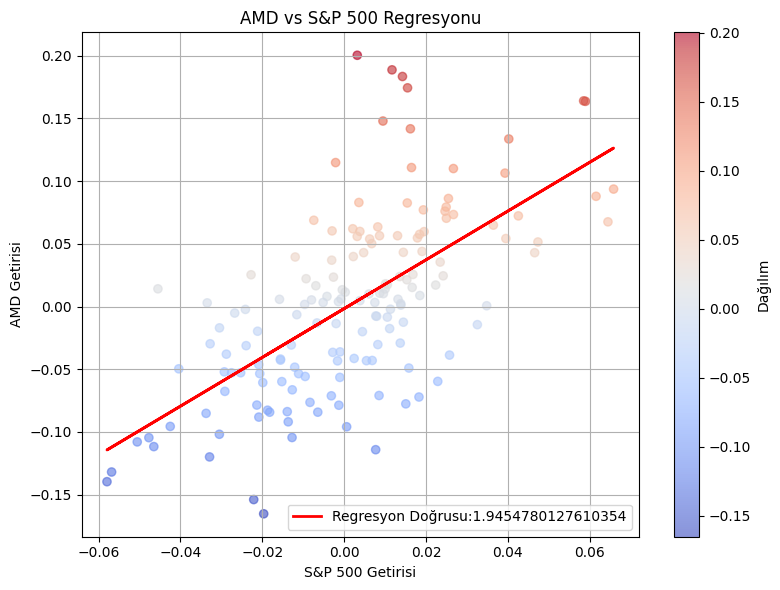

In [110]:
import matplotlib.pyplot as plt

X = sm.add_constant(returns_df['S&P500'])  # X: Bağımsız değişken (SP500), sabit (const) dahil
y = returns_df['AMD']                  # y: Bağımlı değişken (AMD)

model = sm.OLS(y, X).fit()            # OLS (regresyon) modeli kuruldu

# Regresyon doğrusu için tahmin edilen değerler
predicted_amd = model.predict(X)

# Grafik çizimi
plt.figure(figsize=(8, 6))
plt.scatter(returns_df['S&P500'], returns_df['AMD'], c=returns_df['AMD'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Dağılım')
plt.plot(returns_df["S&P500"], predicted_amd, color='red', linewidth=2, label=f"Regresyon Doğrusu:{beta}")
plt.xlabel("S&P 500 Getirisi")
plt.ylabel("AMD Getirisi")
plt.title('AMD vs S&P 500 Regresyonu')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
